In [1]:
import demo
import time
import warnings
warnings.filterwarnings('ignore') 

In [2]:
start_time = time.time() 
scIWNN_impute_obj = demo.scIWNN_impute("./example_data/observe.csv",60)
scIWNN_impute_obj.process_file()
end_time = time.time() 
duration = end_time - start_time 
print('running  ：%.6f seconds' % duration)

reading...
The data contains 1799 cells and 5115 genes.
=> Epoch 1, Loss: 37.59
=> Epoch 6, Loss: 11.24
=> Epoch 11, Loss: 6.58
=> Epoch 16, Loss: 5.959
=> Epoch 21, Loss: 5.513
=> Epoch 26, Loss: 5.256
=> Epoch 31, Loss: 5.01
=> Epoch 36, Loss: 4.923
=> Epoch 41, Loss: 4.891
=> Epoch 46, Loss: 4.852
=> Epoch 51, Loss: 4.822
=> Epoch 56, Loss: 4.788
Writing to file in /example_data/scIWNN_impute.csv...
running  ：249.320379 seconds


In [3]:
import pandas as pd
import scprep
import numpy as np
def normal(expression_data):
    return ((expression_data.T-expression_data.mean(axis=1))/expression_data.std(axis=1,ddof=1)).T
reference = pd.read_csv("./example_data/reference.csv",index_col=0,header=0).T
re_norm  = np.log2(1+scprep.normalize.library_size_normalize(reference))
observe = pd.read_csv("./example_data/observe.csv",index_col=0,header=0).T
ob_norm  = np.log2(1+scprep.normalize.library_size_normalize(observe))
scIWNN_imputed = pd.read_csv("./example_data/scIWNN_impute.csv",index_col=0,header=0).T
scIWNN_norm = np.log2(1+scprep.normalize.library_size_normalize(scIWNN_imputed))
label = pd.read_csv("./example_data/label.csv")['cell']

In [4]:
import sklearn.manifold 
tsne_operator = sklearn.manifold.TSNE(n_components=2)
Y_observe = tsne_operator.fit_transform(normal(ob_norm))
Y_reference = tsne_operator.fit_transform(normal(re_norm))
Y_impute = tsne_operator.fit_transform(normal(scIWNN_norm ))

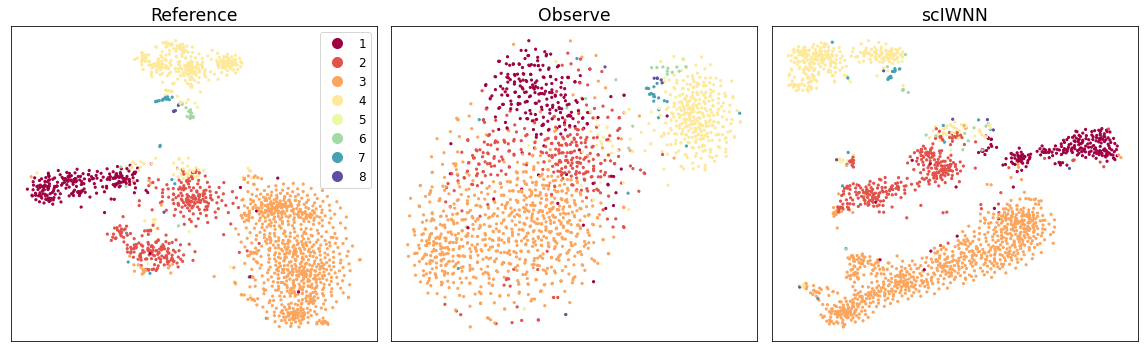

In [5]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16, 5))


scprep.plot.scatter2d(Y_reference, title="Reference",
                      c=label, ticks=False, cmap='Spectral', ax=ax1)


scprep.plot.scatter2d(Y_observe, title="Observe", legend=False,
                      c=label, ticks=False, cmap='Spectral', ax=ax2)


scprep.plot.scatter2d(Y_impute, title="scIWNN", legend=False,
                      c=label, ticks=False, cmap='Spectral', ax=ax3)

plt.tight_layout()
plt.show()